In [241]:
import cv2
import os
import skimage
from skimage import data
from skimage import transform
import PIL
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
import tensorflow as tf
from scipy import ndimage, misc
from skimage.transform import rotate
HEIGHT=28
WIDTH=28

In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) if f.endswith(".jpg")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(str(d))
    return images, labels

In [3]:
ROOT_PATH = '/home/DL/MnistTransformation/'
train_data_directory = os.path.join(ROOT_PATH, "mnistTransformationDataset/training")
#test_data_directory = os.path.join(ROOT_PATH, "outPut/val")

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data',one_hot = True)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
mnistNoOnehot = input_data.read_data_sets('MNIST_data')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
X_train = mnist.train.images*255
Y_train = mnist.train.labels
X_val = mnist.validation.images*255
Y_val = mnist.validation.labels
X_test = mnist.test.images*255
Y_test = mnist.test.labels


In [21]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(X_train)))
print("- Validation-set:\t{}".format(len(X_val)))
print("- Test-set:\t\t{}".format(len(X_test)))

Size of:
- Training-set:		55000
- Validation-set:	5000
- Test-set:		10000


In [43]:
X_train_reshape = np.reshape(X_train,(55000,28,28))
Y_train_reshape = mnistNoOnehot.train.labels
X_test_reshape = np.reshape(X_test,(10000,28,28))
Y_test_reshape = mnistNoOnehot.test.labels
X_val_reshape = np.reshape(X_val,(5000,28,28))
Y_val_reshape = mnistNoOnehot.validation.labels

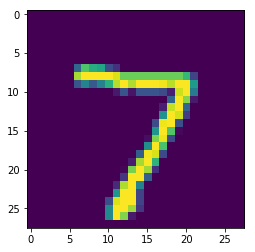

In [44]:
plt.imshow(X_test_reshape[0])

In [26]:
X_test_reshape[2].shape

(28, 28)

In [27]:
Y_test_reshape[0]

7

In [153]:
#################define training set and label
from skimage import color
from skimage.color import rgb2gray
Images = X_train_reshape
IntLabels= [int(L) for L in Y_train_reshape]
Labels = [str(IntLabel) for IntLabel in IntLabels]

In [149]:
ppppp=int(Y_train_reshape[0])

In [150]:
str(ppppp)

'7'

In [ ]:
Y_train_reshape

In [106]:
Images.shape

(55000, 28, 28)

In [33]:
len(Labels)

55000

In [107]:
ImagesT = [color.gray2rgb(image)  for image in Images ]

In [112]:
len(ImagesT)

55000

In [114]:
ImagesT[0].shape

(28, 28, 3)

In [168]:
Images = ImagesT

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


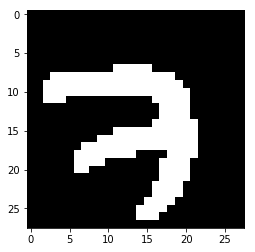

In [169]:
plt.imshow(Images[0])

In [129]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(threshold=np.inf)


In [ ]:
Images[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


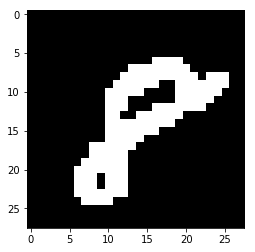

In [176]:
plt.imshow(Images[54999])

In [166]:
Images[0].shape

(28, 28)

In [180]:
#add value 15 in hsv images,yellow will change into green
i=0


for p in range(0,10*5500):
    
    img = Images[i]
    #img_hsv = color.rgb2hsv
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    for j in range(1,5):
        #40images add 1 on hue
        
        
        turn_green_hsv = img_hsv.copy()
        MIN = np.min(turn_green_hsv[:,:,0])
        MAX = np.max(turn_green_hsv[:,:,0])
        random_factor = random.uniform(-MIN,255-MAX)
        turn_green_hsv[:, :, 0] = turn_green_hsv[:, :, 0]+random_factor
        turn_green_img = cv2.cvtColor(turn_green_hsv, cv2.COLOR_HSV2BGR)
       
        #print('factor=',random_factor)
        #print('h=',turn_green_hsv[:,:,0])
        filename=train_data_directory+ '/' + Labels[i] + '/' + Labels[i]+'_hsv_h_'+str(j)+str(i)+'.jpg'
        plt.imsave(filename, turn_green_img)
    #print(filename)
    i+=1

In [190]:
Images[0].shape

(28, 28, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


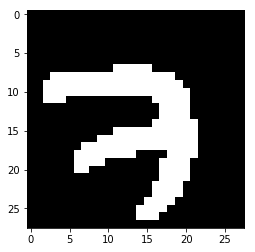

In [189]:
plt.imshow(Images[0])

In [ ]:
#gamma_trans
from skimage import data, exposure, img_as_float

i=0
for p in range(0,10*5500):
    img = Images[i]
    for j in range(1,5):#8 images with gamma
        random_factor = random.uniform(0,10)
        img_corrected = exposure.adjust_gamma(img,random_factor)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+ Labels[i]+'_gamma_'+str(j)+'_'+str(i)+'.jpg'
        plt.imsave(filename, img_corrected)
    print(filename)
    i+=1

In [287]:
iii=Image.open('/home/DL/MnistTransformation/mnistTransformationDataset/training/8/8_affined_2_0048_sx_-1_sy_-1_r_-7_th_0_tw_7.jpg')

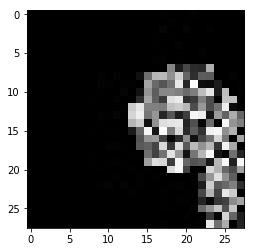

In [288]:
plt.imshow(iii)

In [ ]:
#rotation rotated 15 degree
i=0
from skimage.color import rgb2gray
for p in range(0,10*5500):
    img = Images[i]
    
    for j in range(1,3):#max 45
        random_factor = random.uniform(-30,30)
        img_copy = img/255.0000
        
        img_rotated=rotate(img_copy,random_factor,resize=False)
        
        img_rotated15 = 255.0000*(img_rotated)
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_rotate_'+str(1*j)+'_'+str(int(random_factor))+'.jpg'
        plt.imsave(filename, img_rotated15)
    print(filename)
    i+=1

In [ ]:
#translation


from skimage import transform as transform
i=0
for p in range(0,10*5500):
    img = Images[i]/255.0000
    
    for j in range(1,4):#max 45
        random_H = random.uniform(-HEIGHT/2,HEIGHT/2)
        random_W = random.uniform(-WIDTH/2,WIDTH/2)
        tform = transform.SimilarityTransform(scale=1, rotation=0,
                               translation=(random_H, random_W))
        
        
        img_translationing=transform.warp(img,tform)
        img_translation = img_translationing*255.0000
        H_index = str(int(random_H))
        W_index = str(int(random_W))

        
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_translation_'+str(1*j)+'_'+H_index+'_'+W_index+'.jpg'
        plt.imsave(filename, img_translation)
    print(filename)
    i+=1

In [ ]:

i=0
for p in range(0,10*5500):
    img = Images[i]/255.0000
    for j in range(1,3):#50 degree max
        random_factor = random.uniform(-1,1)
        tform = transform.AffineTransform(scale=(1.0, 1.0), rotation=0, shear=random_factor,
                        translation=(0, 0))
        img_shearing=transform.warp(img,tform)
        img_sheared = img_shearing*255.0000
        shear_index = str(int(random_factor*100))

        
    
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_sheared_'+str(1*j)+'_00'+shear_index+'.jpg'
        plt.imsave(filename, img_sheared)
    print(filename)
    if img_sheared.shape!=(28,28,3):
        print(img_sheared.shape)
    i+=1

In [ ]:

i=0
for p in range(0,10*5500):
    img = Images[i]/255.0000
    for j in range(1,3):#50 degree max
        scale_factor_h = random.uniform(-2,2)
        scale_factor_w = random.uniform(-2,2)
        rotation_factor = random.uniform(-30,30)
        shear_factor = random.uniform(-1,1)

        translation_factorH = random.uniform(-HEIGHT/2,HEIGHT/2)
        translation_factorW = random.uniform(-WIDTH/2,WIDTH/2)
        
        tform = transform.AffineTransform(scale=(scale_factor_h, scale_factor_w), rotation=rotation_factor, shear=shear_factor, translation=(translation_factorH, translation_factorW))
        img_affining=transform.warp(img,tform)
        img_affined = img_shearing*255.0000
        shear_index = str(int(random_factor*100))
        sx = str(int(scale_factor_w))
        sy = str(int(scale_factor_h))
        rotation_index = str(int(random.uniform(-30,30)))
        th= str(int(translation_factorH))
        tw = str(int(translation_factorW))

        
    
    
        filename=train_data_directory+'/'+Labels[i]+'/'+Labels[i]+'_affined_shear'+str(1*j)+'_00'+shear_index+'_sx_'+sx+'_sy_'+sy+ '_r_'+rotation_index+'_th_'+th+'_tw_'+tw+'.jpg'
        plt.imsave(filename, img_affined)
    print(filename)
    if img_sheared.shape!=(28,28,3):
        print(img_sheared.shape)
    i+=1

In [205]:
iiii= Images[0]

In [209]:
from skimage.transform import rotate
from skimage import data
image = data.camera()

In [217]:
iiii=rotate(image, 20)

In [211]:
rotate(image, 2, resize=True).shape

(530, 530)

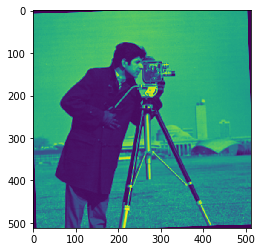

In [222]:
plt.imshow(iiii)

In [221]:
iiii=rotate(image, 2, resize=False)

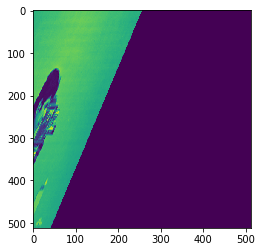

In [282]:
from skimage import transform as transform
tform = transform.AffineTransform(scale=(2,1), rotation=0, shear=-1,
                        translation=(0, 0))
r=transform.warp(image,tform)
plt.imshow(r)

In [238]:
print(tform.params)

[[  1.  -0.   0.]
 [  0.   1. 100.]
 [  0.   0.   1.]]


In [239]:
r=transform.warp(iiii,tform)

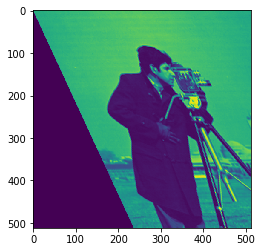

In [264]:
plt.imshow(r)